# Data Science Projects with Python
## Chapter 3 | Details of Logistic Regression and Feature Exploration

In [7]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt # plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add plotting functionality
import seaborn as sns # a fancy plotting package
mpl.rcParams['figure.dpi'] = 200 # high res figures

In [8]:
df = pd.read_csv('.\Data\Chapter_1_cleaned_data.csv')

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [10]:
features_response = df.columns.tolist()

In [11]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [12]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [13]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school','none', 'others', 'university']

In [14]:
# using a list comprehension to remove unwanted features
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### Pearson Correlation | Correlation Matrix
---
`pandas.DataFrame.corr()` is a simple way to get an overview over how the features correlate with each other. Default is [Pearsons correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), also known as Pearsons r. 

In [16]:
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot: >

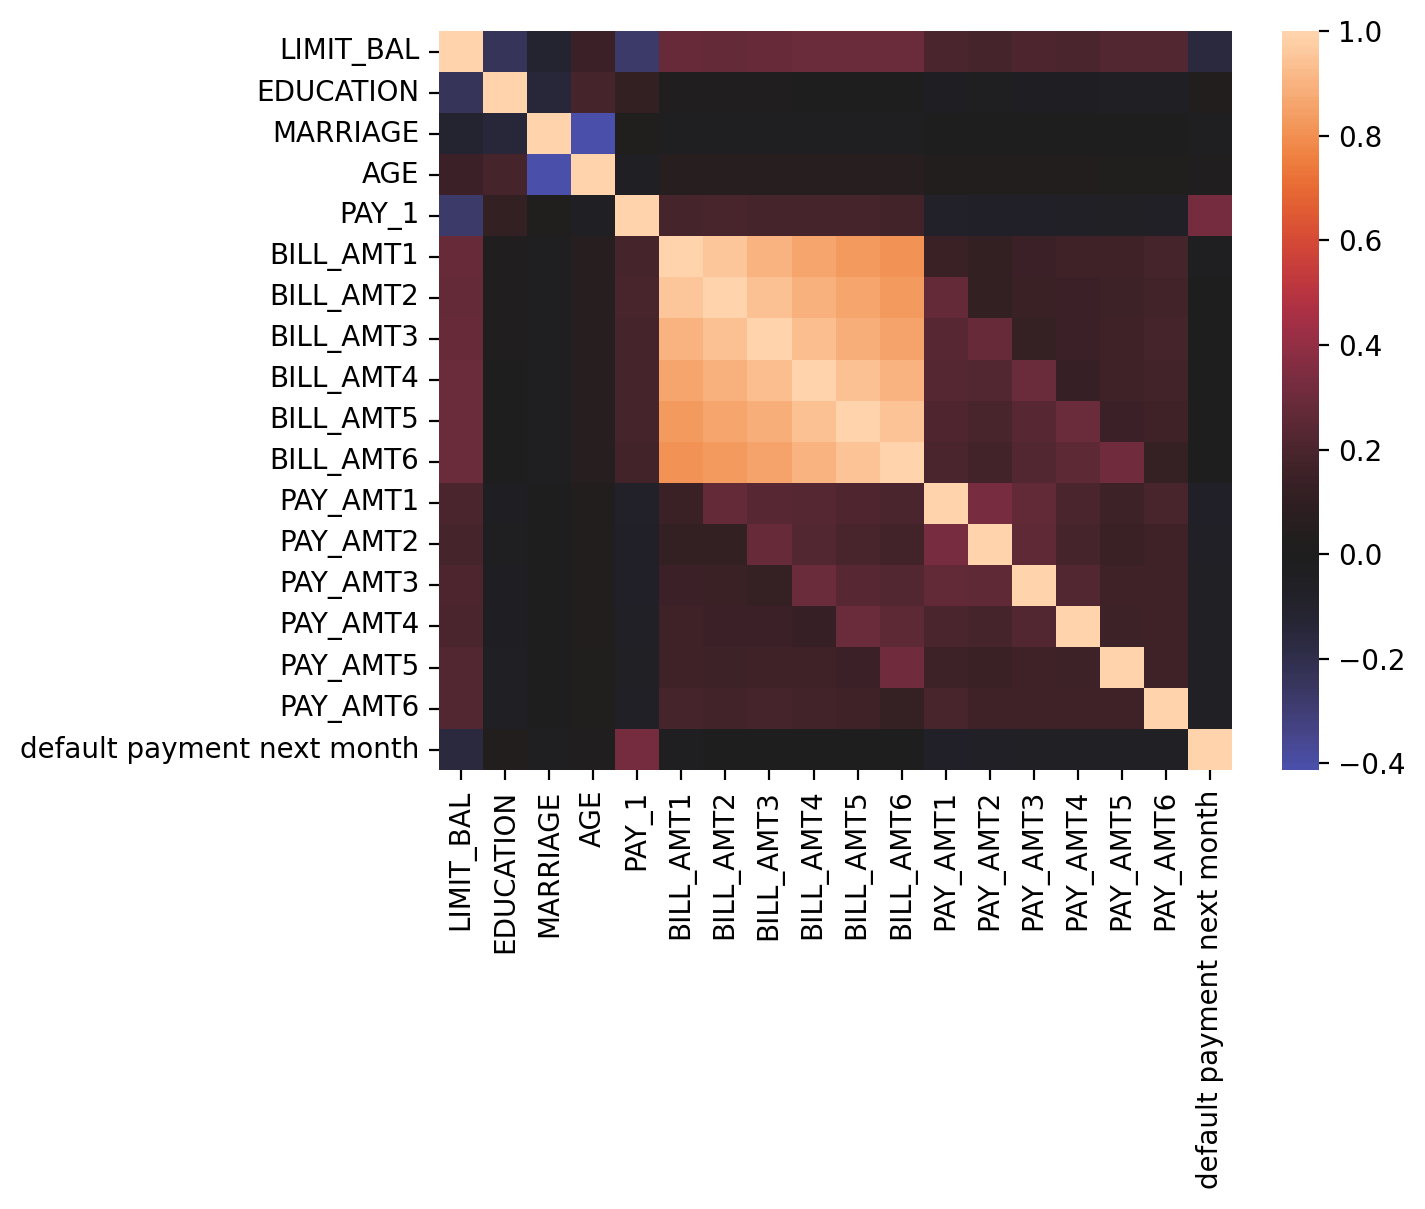

In [17]:
sns.heatmap(corr, 
           xticklabels = corr.columns.values, 
           yticklabels = corr.columns.values,
           center = 0) # plotting the confusion matrix 


Brighter values indicate higher correlation. Blue indicates negative and red/yellow indicates positive correlation. Features correlate with themselves to 100%, obviously. BILL_AMT features correlate with each other, which makes sense (can't pay off all of the credit in one month, otherwise why take on the loan). 

Focus should be on correlation with "default payment next month", which is the target variable. PAY_1 has a high positive correlation, LIMIT_BAL a slightly negative one. PAY_AMT may show some negative correlation, let's see:

In [19]:
corr["default payment next month"] # indeed, a very slight negative correlation between -0.05 and -0.07

LIMIT_BAL                    -0.154423
EDUCATION                     0.034966
MARRIAGE                     -0.026030
AGE                           0.014334
PAY_1                         0.325365
BILL_AMT1                    -0.020508
BILL_AMT2                    -0.014579
BILL_AMT3                    -0.014649
BILL_AMT4                    -0.011349
BILL_AMT5                    -0.006753
BILL_AMT6                    -0.006274
PAY_AMT1                     -0.072431
PAY_AMT2                     -0.061555
PAY_AMT3                     -0.058010
PAY_AMT4                     -0.054572
PAY_AMT5                     -0.056651
PAY_AMT6                     -0.054838
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [11]:
#pd.plotting.scatter_matrix(df[features_response])

## ANOVA F-Test
#### (<u>AN</u>alysis <u>O</u>f <u>V</u>ariance)

In [20]:
X = df[features_response].iloc[:,:-1] # all but the last column, which is dependant i.e. target variable
y = df[features_response].iloc[:,-1]
print(X.shape, y.shape)

(26664, 17) (26664,)


In [22]:
from sklearn.feature_selection import f_classif # for f-test

In [23]:
f_stat, f_p_value = f_classif(X,y)

In [24]:
f_stat

array([6.51324071e+02, 3.26377679e+01, 1.80780265e+01, 5.47913953e+00,
       3.15667230e+03, 1.12184060e+01, 5.66845420e+00, 5.72293789e+00,
       3.43474047e+00, 1.21608188e+00, 1.04956059e+00, 1.40612679e+02,
       1.01408321e+02, 9.00238734e+01, 7.96400211e+01, 8.58432945e+01,
       8.04207840e+01])

In [25]:
f_p_value

array([5.83836587e-142, 1.12217491e-008, 2.12755520e-005, 1.92520602e-002,
       0.00000000e+000, 8.11022595e-004, 1.72796505e-002, 1.67515708e-002,
       6.38496543e-002, 2.70140911e-001, 3.05617603e-001, 2.35835447e-032,
       8.25612412e-024, 2.54264104e-021, 4.77411188e-019, 2.09011996e-020,
       3.21956535e-019])

In [26]:
#sorting the features by their p-value
f_test_df = pd.DataFrame({'Feature': features_response[:-1],
                         'F statistic': f_stat,
                         'p value': f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [29]:
#sns.set_theme(style= "ticks")
#df_seaborn = corr
#sns.pairplot(df_seaborn)
# this works, but takes a long time :)

In [30]:
from sklearn.feature_selection import SelectPercentile # Select features according to a percentile of the highest scores.

In [31]:
selector = SelectPercentile(f_classif, percentile = 20)

In [32]:
selector.fit(X,y)

SelectPercentile(percentile=20)

In [33]:
best_feature_ix = selector.get_support() # Get a mask, or integer index, of the features selected.
best_feature_ix 

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [34]:
features = features_response[:-1]

In [35]:
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
    
best_features # these are the top 20% with regards to Pearson's r

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [36]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [37]:
# Show the grouped PAY_1 column values and the associated mean of the response variable for each level
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


Following plot shows the overall mean of the credit default rate as a red line, and the means grouped by PAY_1 levels

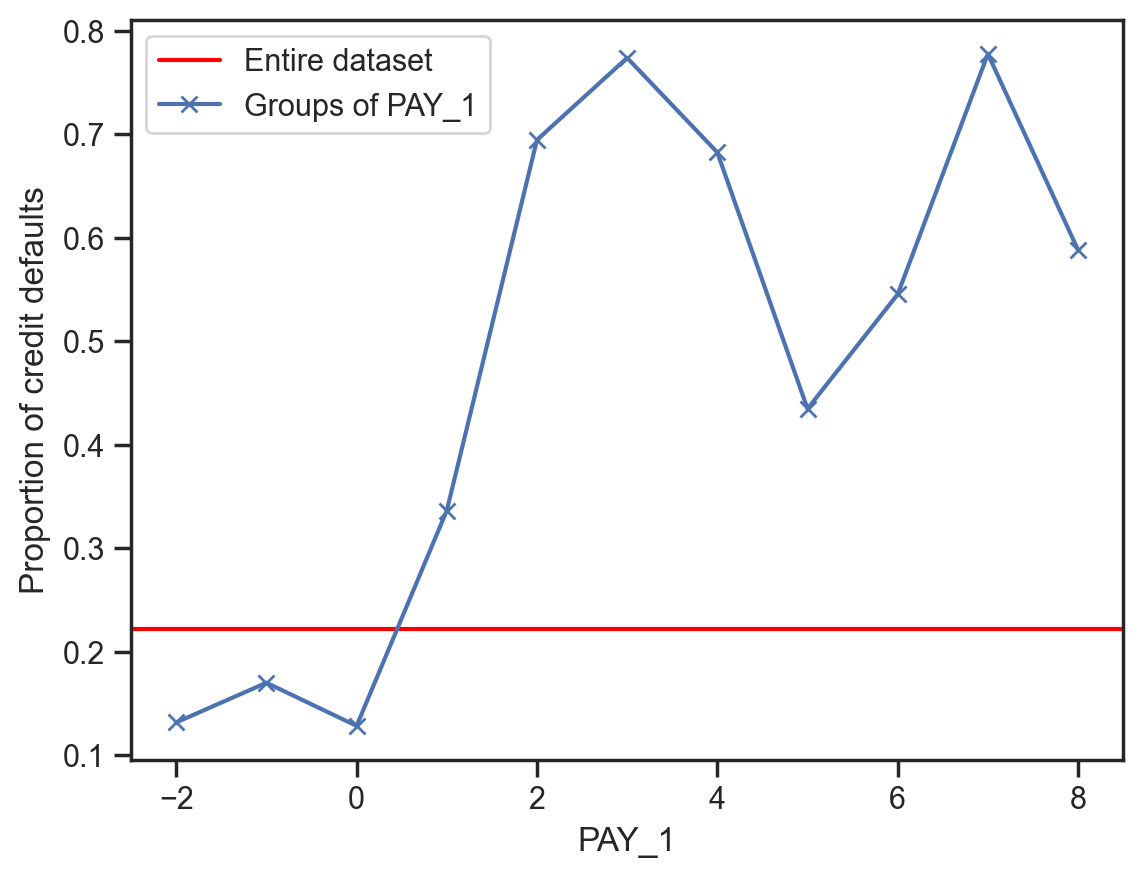

In [38]:
axes = plt.axes()
axes.axhline(overall_default_rate, color = 'red')
group_by_pay_mean_y.plot(marker = 'x', legend = False, ax = axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])


In [39]:
pos_mask = y == 1 # y is response variable, i.e. last column "default payment next month"
neg_mask = y == 0
pos_mask

0         True
1         True
2        False
3        False
4        False
         ...  
26659    False
26660    False
26661     True
26662     True
26663     True
Name: default payment next month, Length: 26664, dtype: bool

Text(0.5, 1.0, 'Credit limits by response variable')

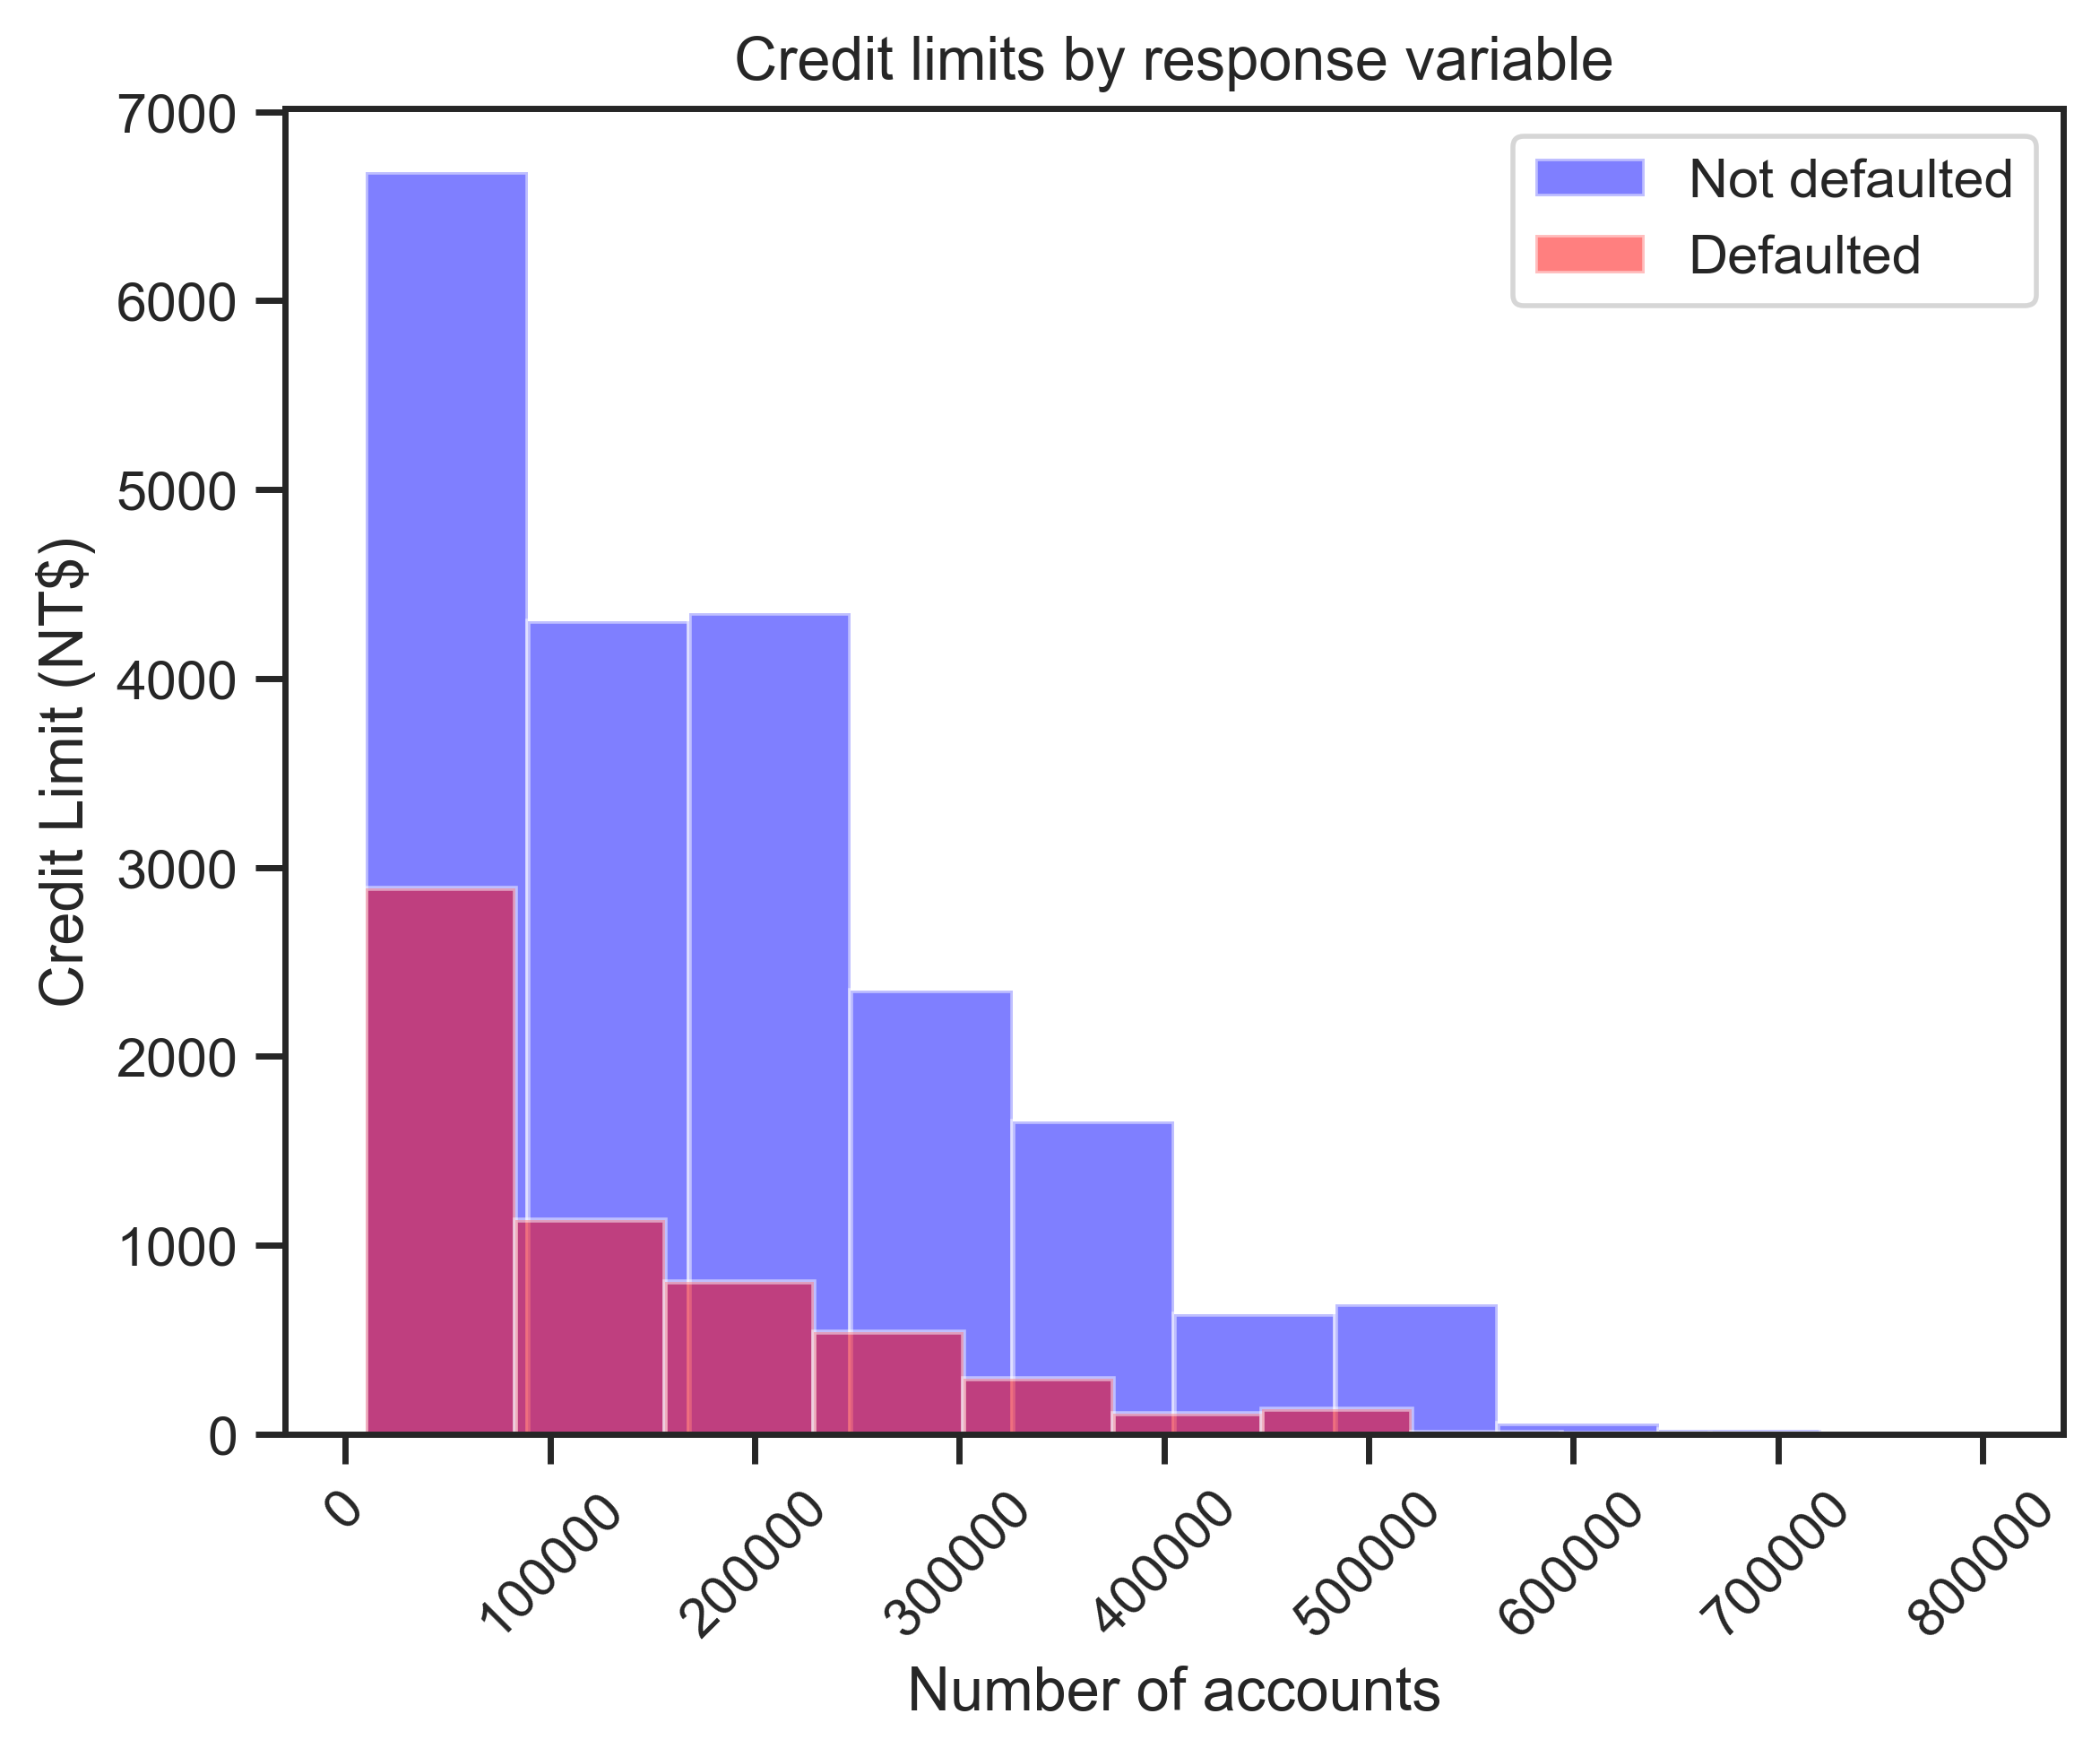

In [43]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'blue') # higher alpha = more transparent
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'red')
axes.tick_params(axis = 'x', labelrotation = 45)
axes.set_ylabel('Credit Limit (NT$)')
axes.set_xlabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')
# bins are off, not the same number and edges

In [41]:
bin_edges = list(range(0,850000,50000)) # creates a list from 0 to 800_000 (doesn't include the last value), step = 50_000
print(bin_edges[-1])

800000


C:\Users\Box\AppData\Local\Temp\ipykernel_17276\1173426162.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

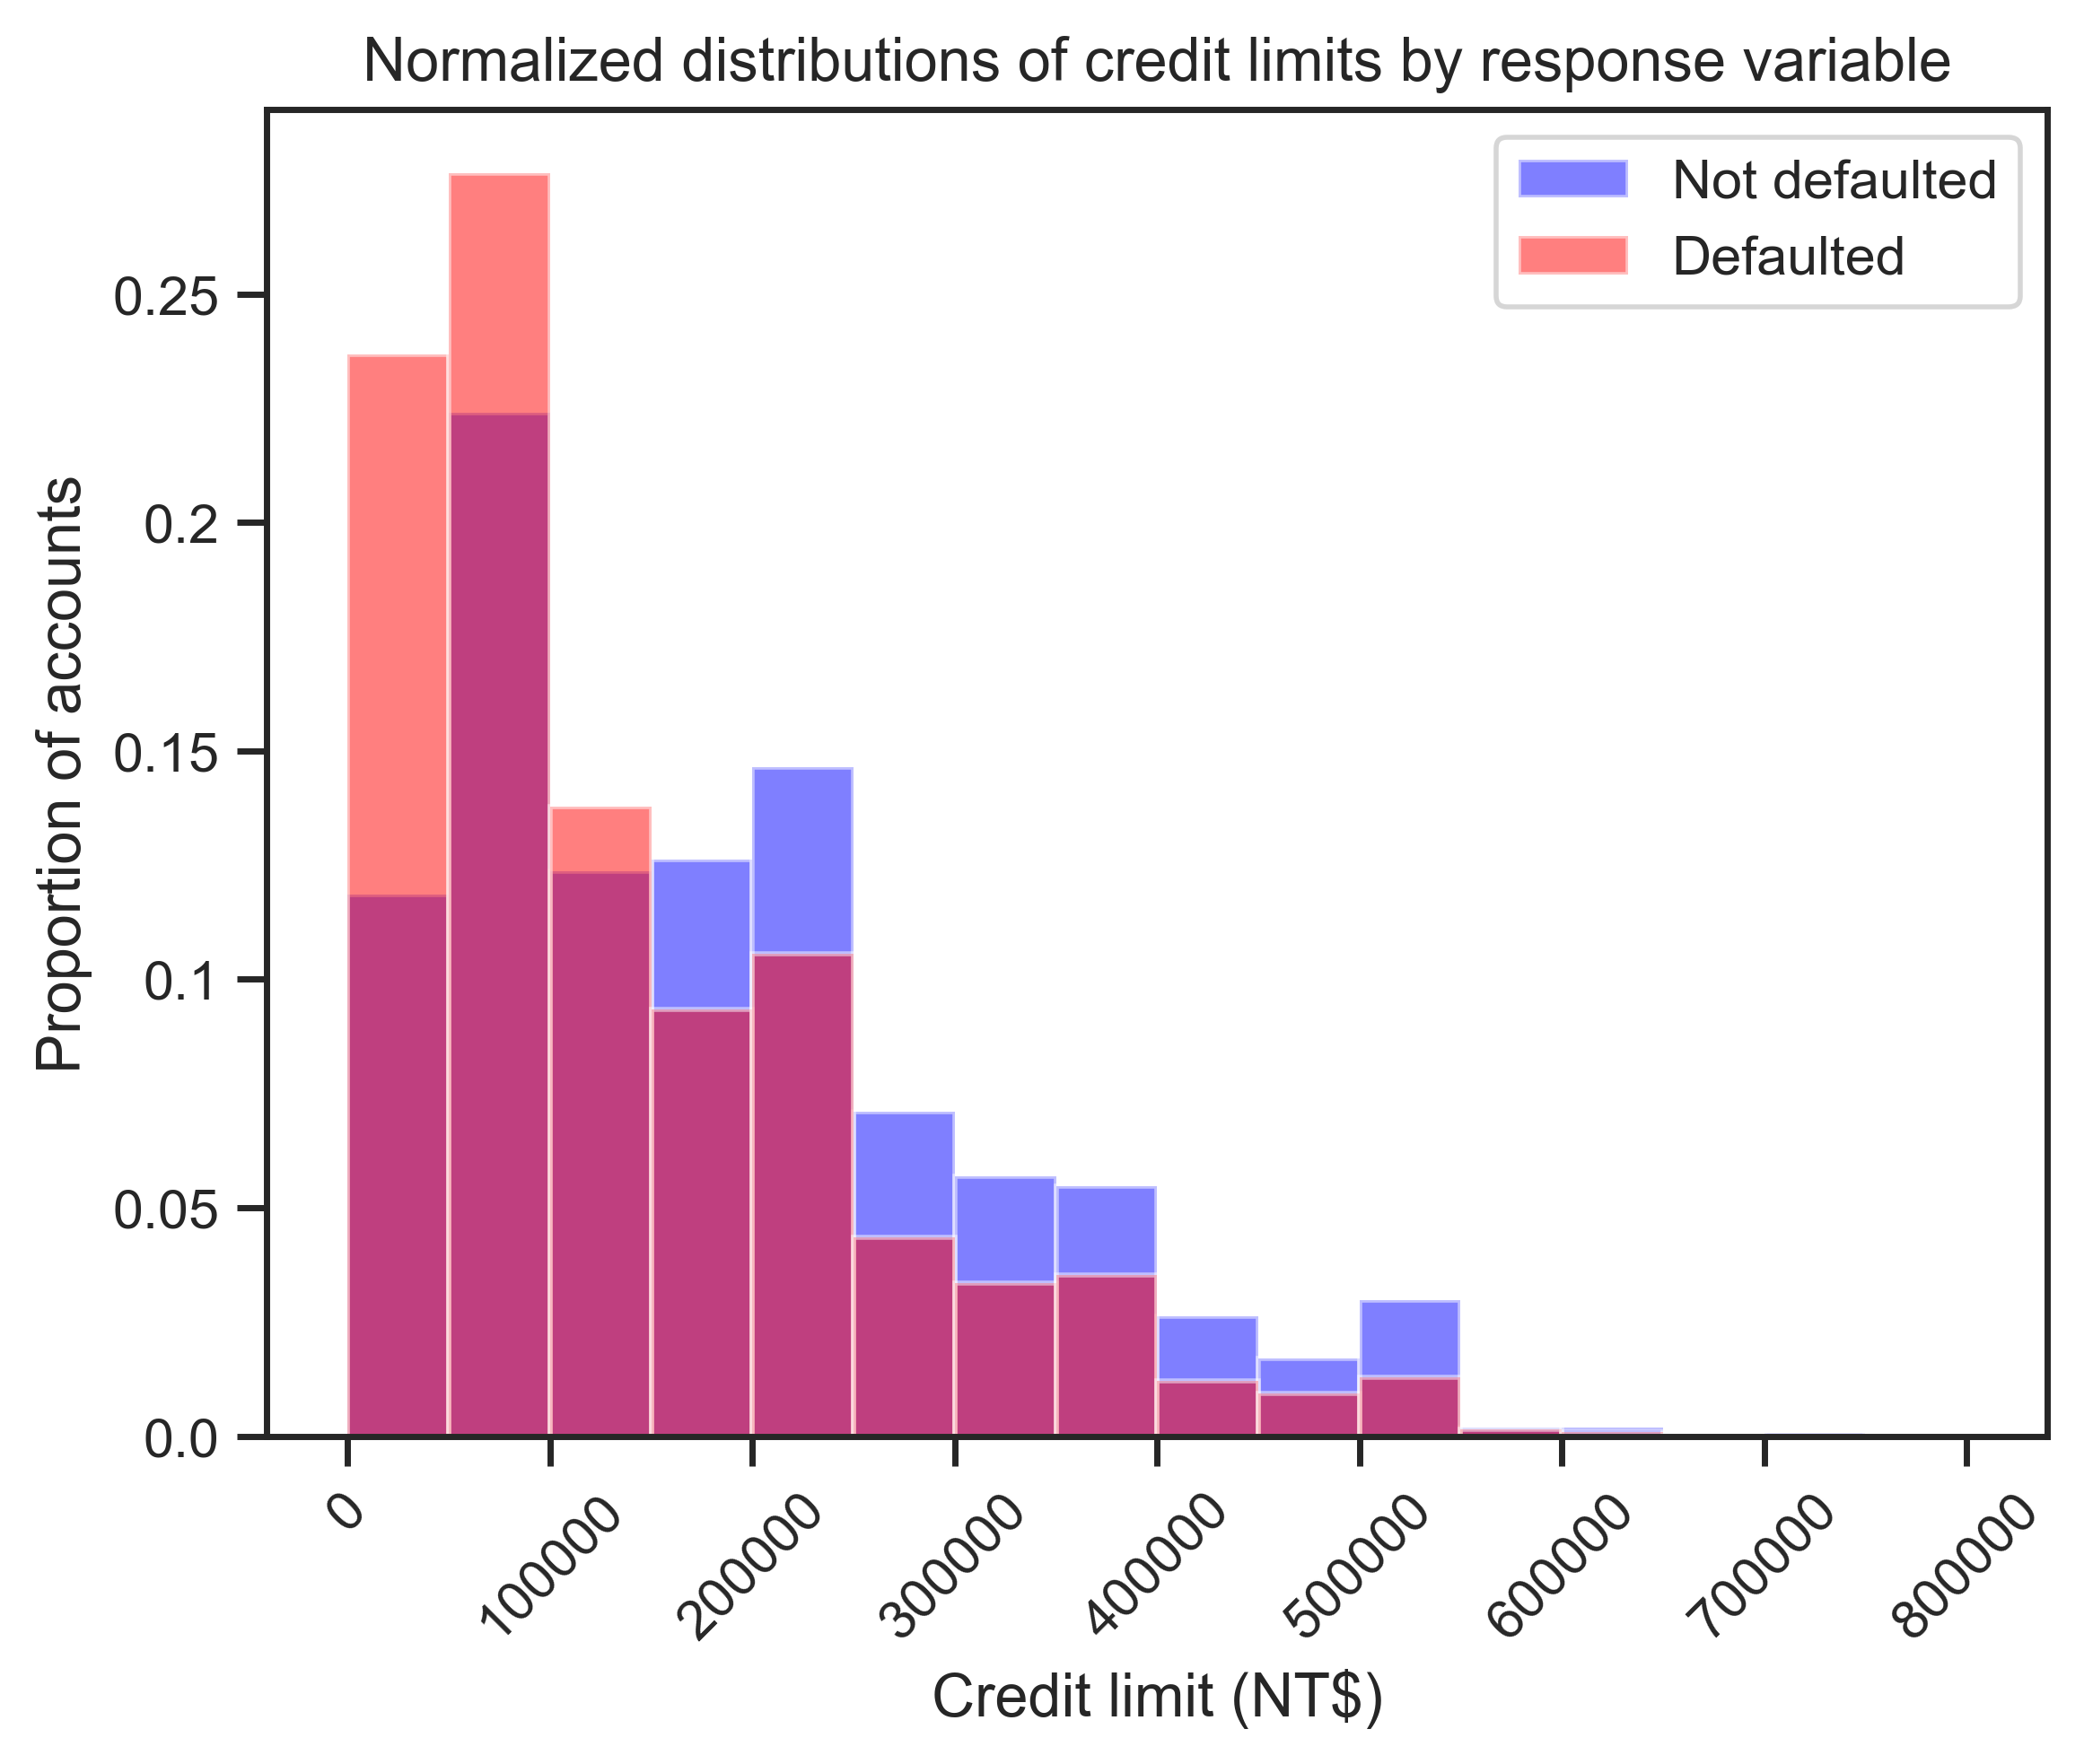

In [42]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins = bin_edges, alpha = 0.5, density = True , color = 'blue')
"""density = True turns histogramm from absolute values to normalized scale. y labels still need to be adjusted"""
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins = bin_edges, alpha = 0.5, density = True, color = 'red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')
# https://matplotlib.org/stable/api/axes_api.html

### Visual communication of quantitative concepts is a core data science skill.

## Before: Univariate feature anaylsis. Now: Multivariate, i.e. considering interactions!

# Feature Engineering(!)

Up until now: only one feature at a time (no interactions) and no prior transformation (only linear dependencies). 

Tansformations like: polynomial, logarithmic, binning (discretization)

Random forest?

In [44]:
np.exp(1)

2.718281828459045

In [45]:
np.exp(0)

1.0

In [46]:
X_exp = np.linspace(-4, 4, 81) 
# np.linspace works like range. The third value specifies the number of values inbetween First and second, produces decimals
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


Text(0.5, 1.0, 'Plot of $e^X$')

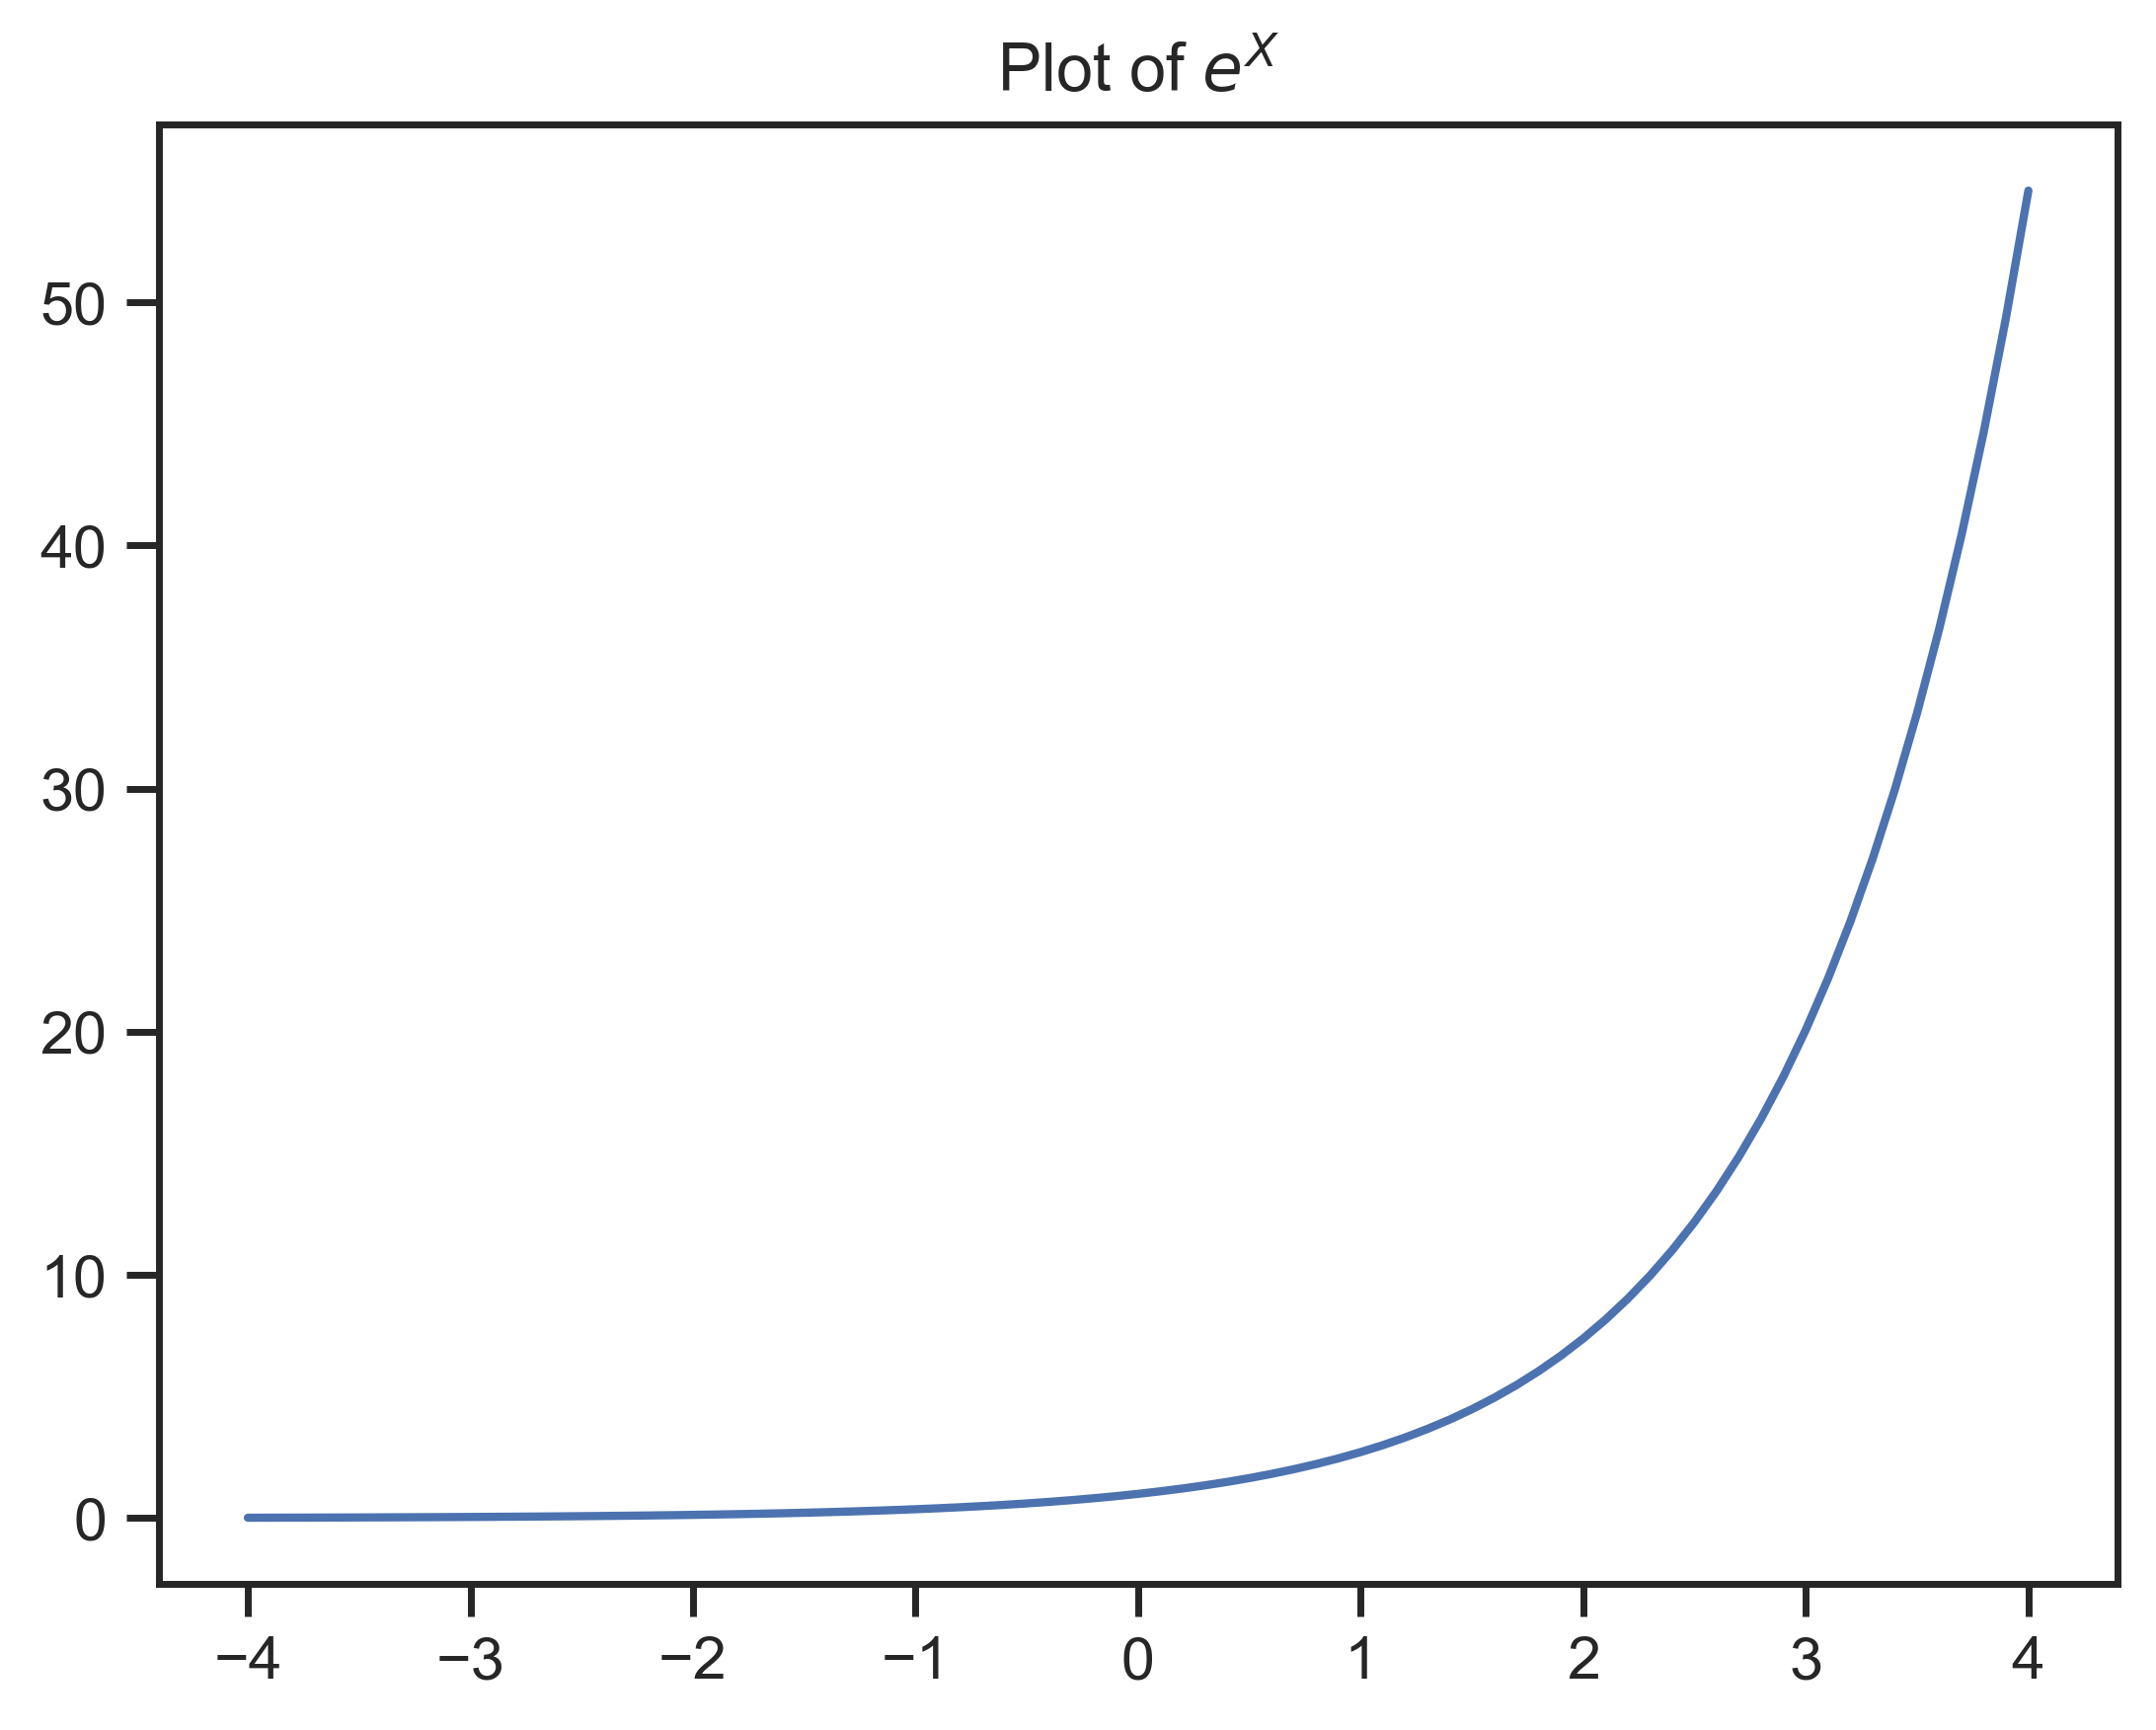

In [47]:
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^X$')


In [48]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

Text(0.5, 1.0, 'Plot of $e^{-X}$')

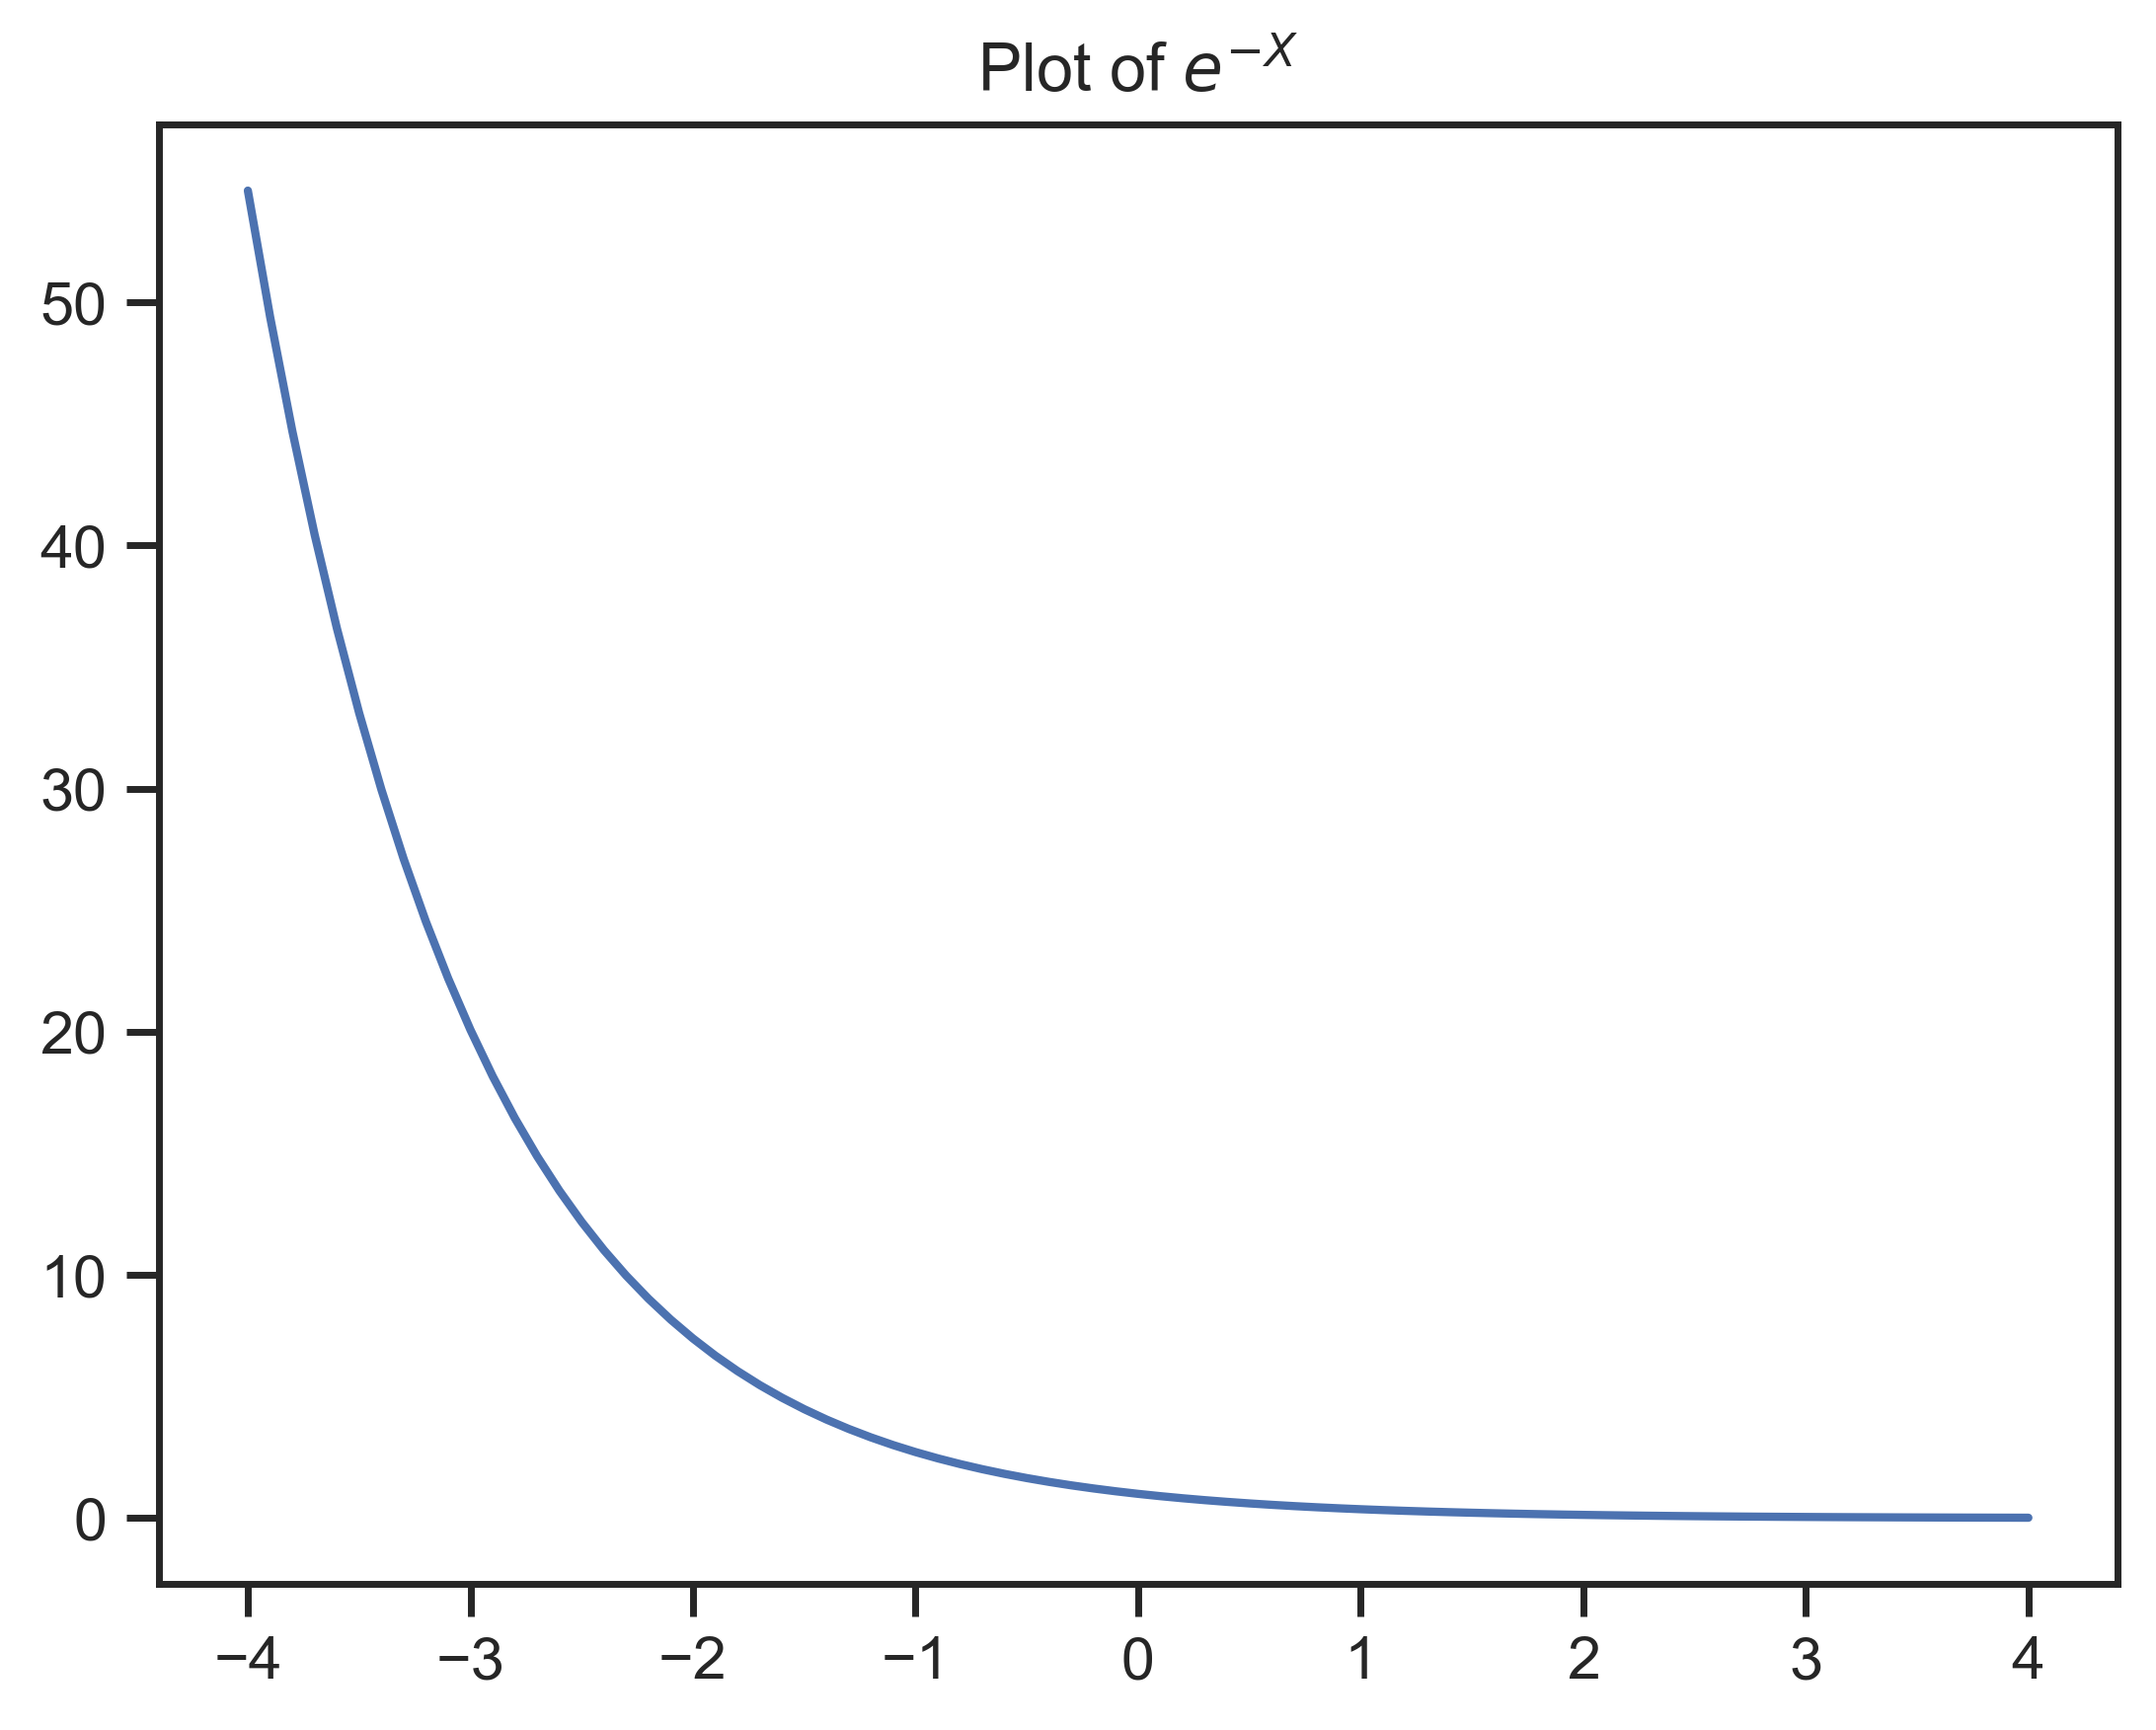

In [49]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

In [38]:
#defining the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

In [52]:
# plotting the sigmoid function
X_sig = np.linspace(-10, 10, 300)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

NameError: name 'sigmoid' is not defined

In [53]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [54]:
p = group_by_pay_mean_y['default payment next month'].values
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [55]:
odds_ratio = p/q
log_odds = np.log(odds_ratio) # this is the basis of logistic regression: the logit (log-odds)
log_odds

array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

In [56]:
group_by_pay_mean_y.index

Int64Index([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PAY_1')

Text(0.5, 0, 'Values of PAY_1')

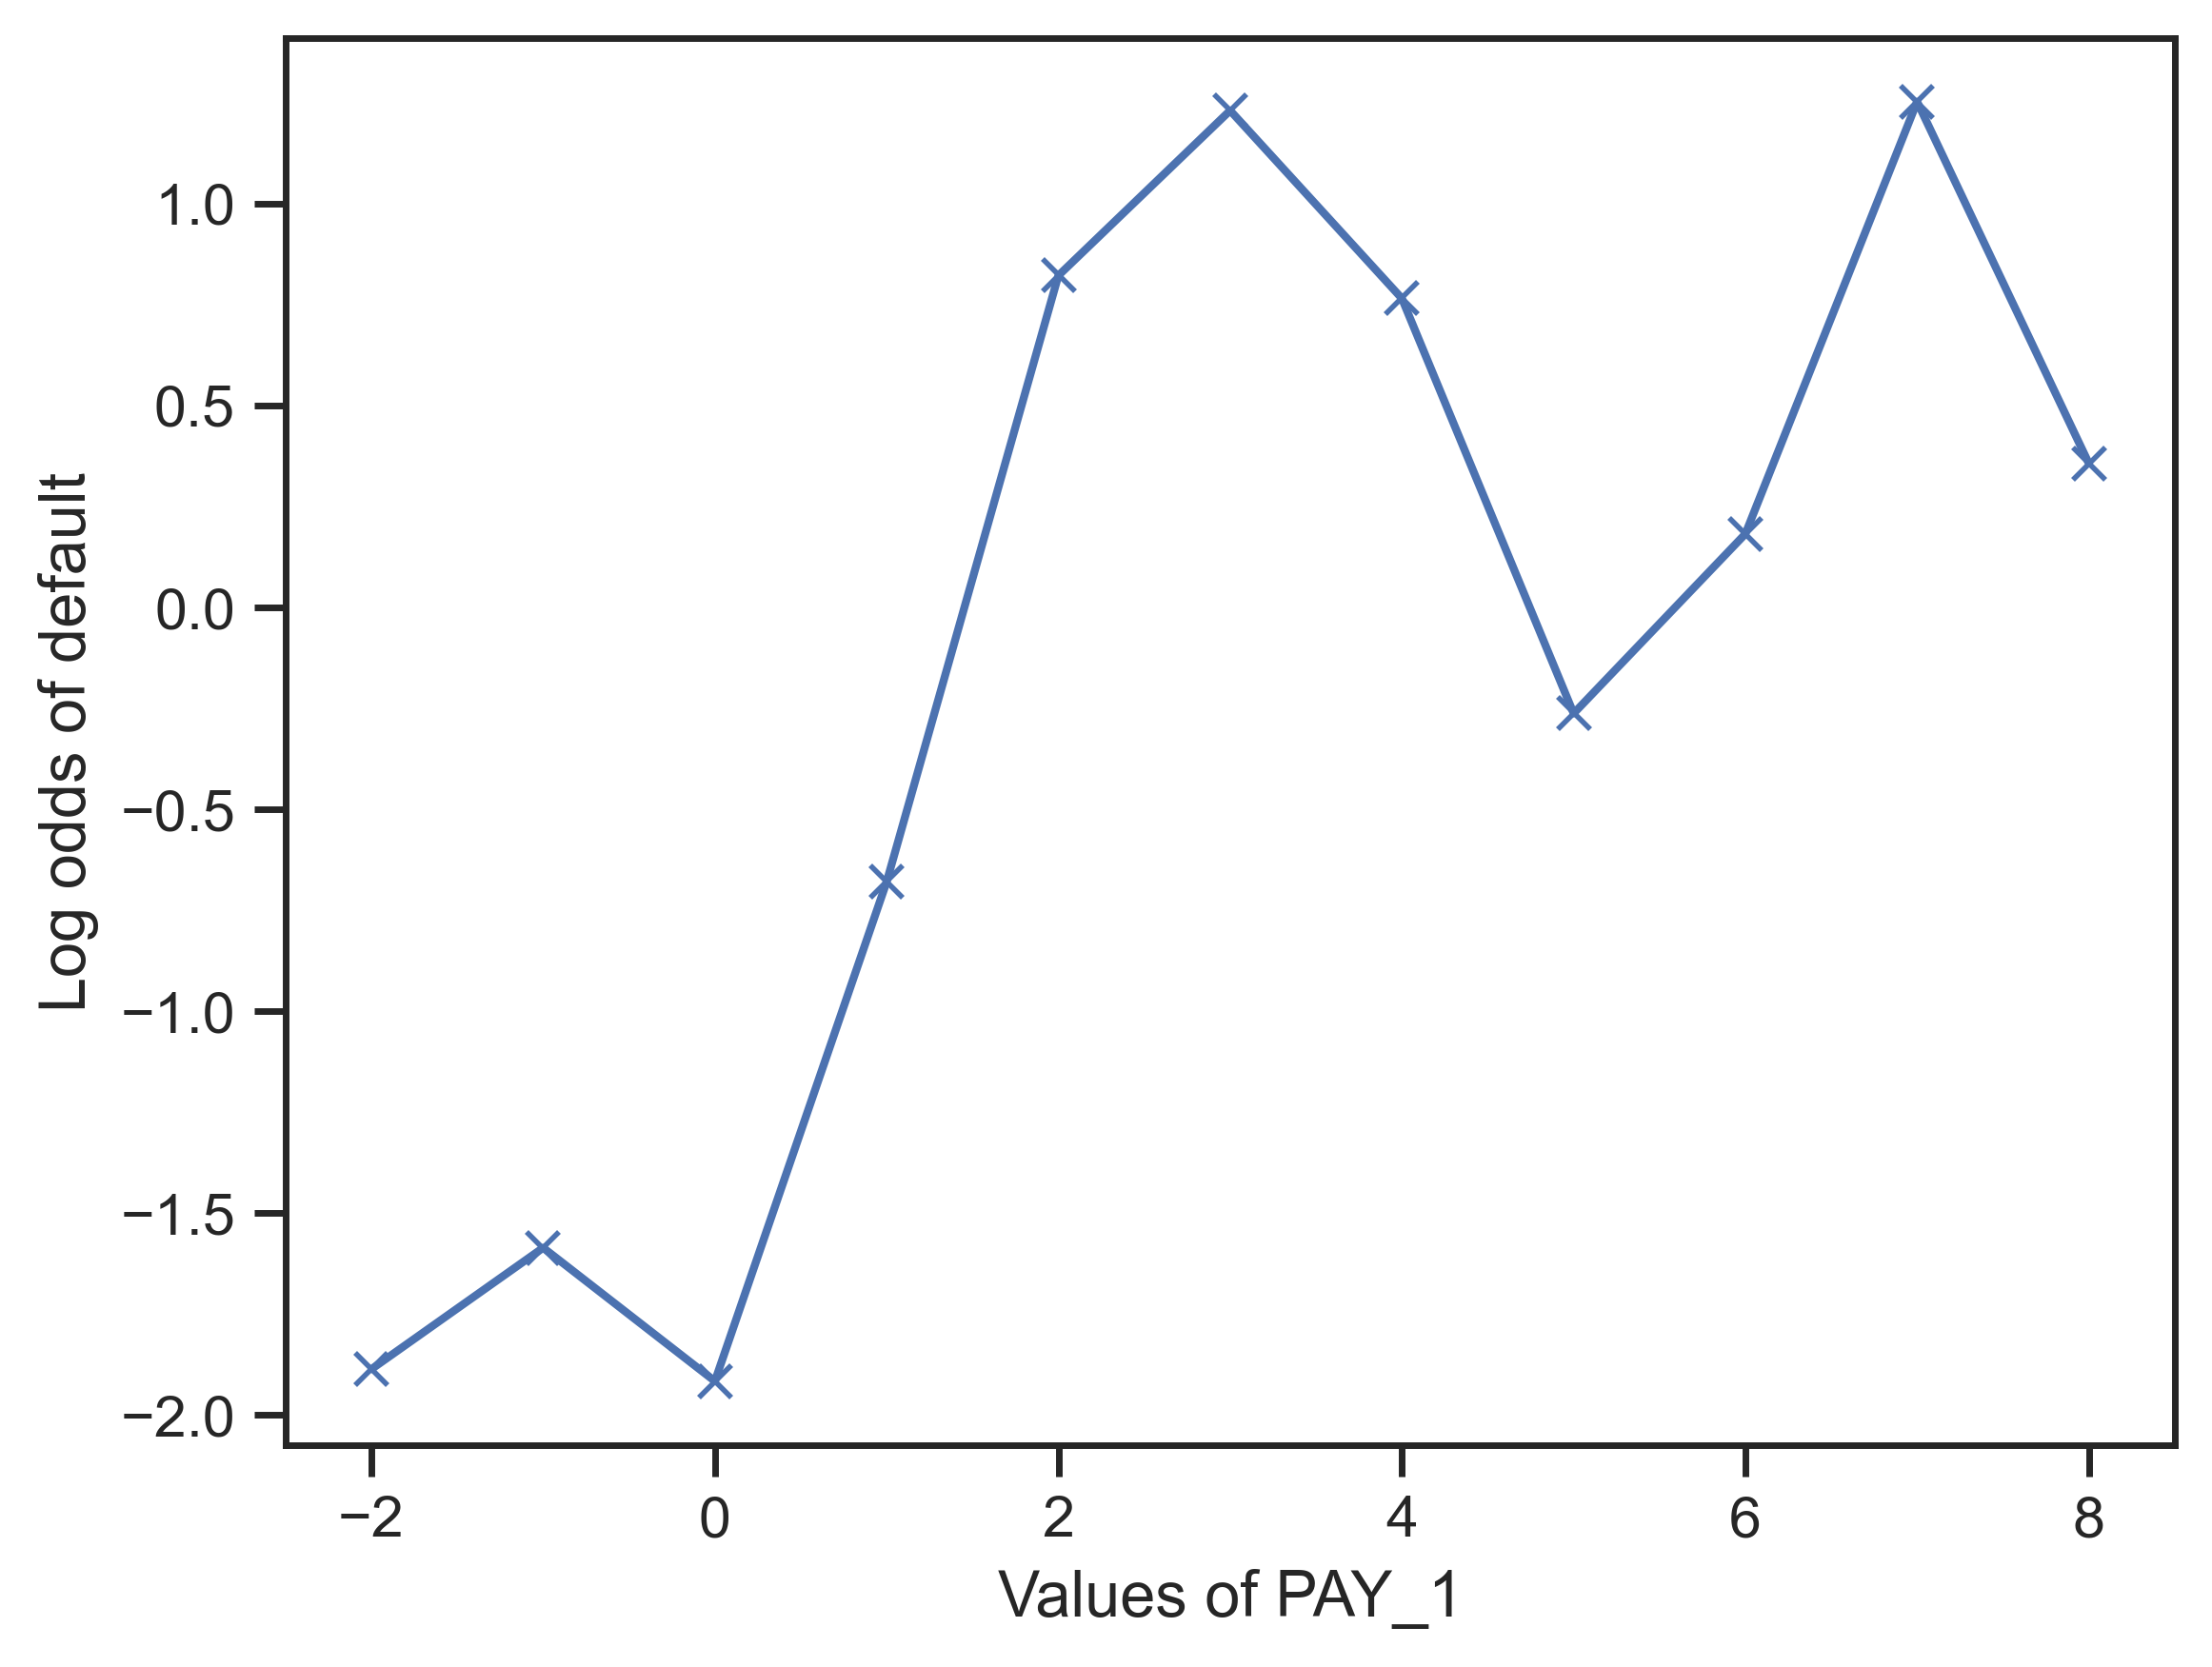

In [57]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x')
# '-x' denotes Crosses for the points and lines inbetween. Add '-xr' for red color. Default is blue
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

### Training a logisitc regression model on synthetic data
With some insightful visualisation

In [58]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1)) # X1 components of random "positive" datapoints 
print(X_1_pos[:3]) # don't need a 0 there
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1)) # X2 components of random "positive" datapoints 
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1)) # X1 components of random "negative" datapoints 
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1)) # X2 components of random "negative" datapoints 
print(X_1_neg[0:3])

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


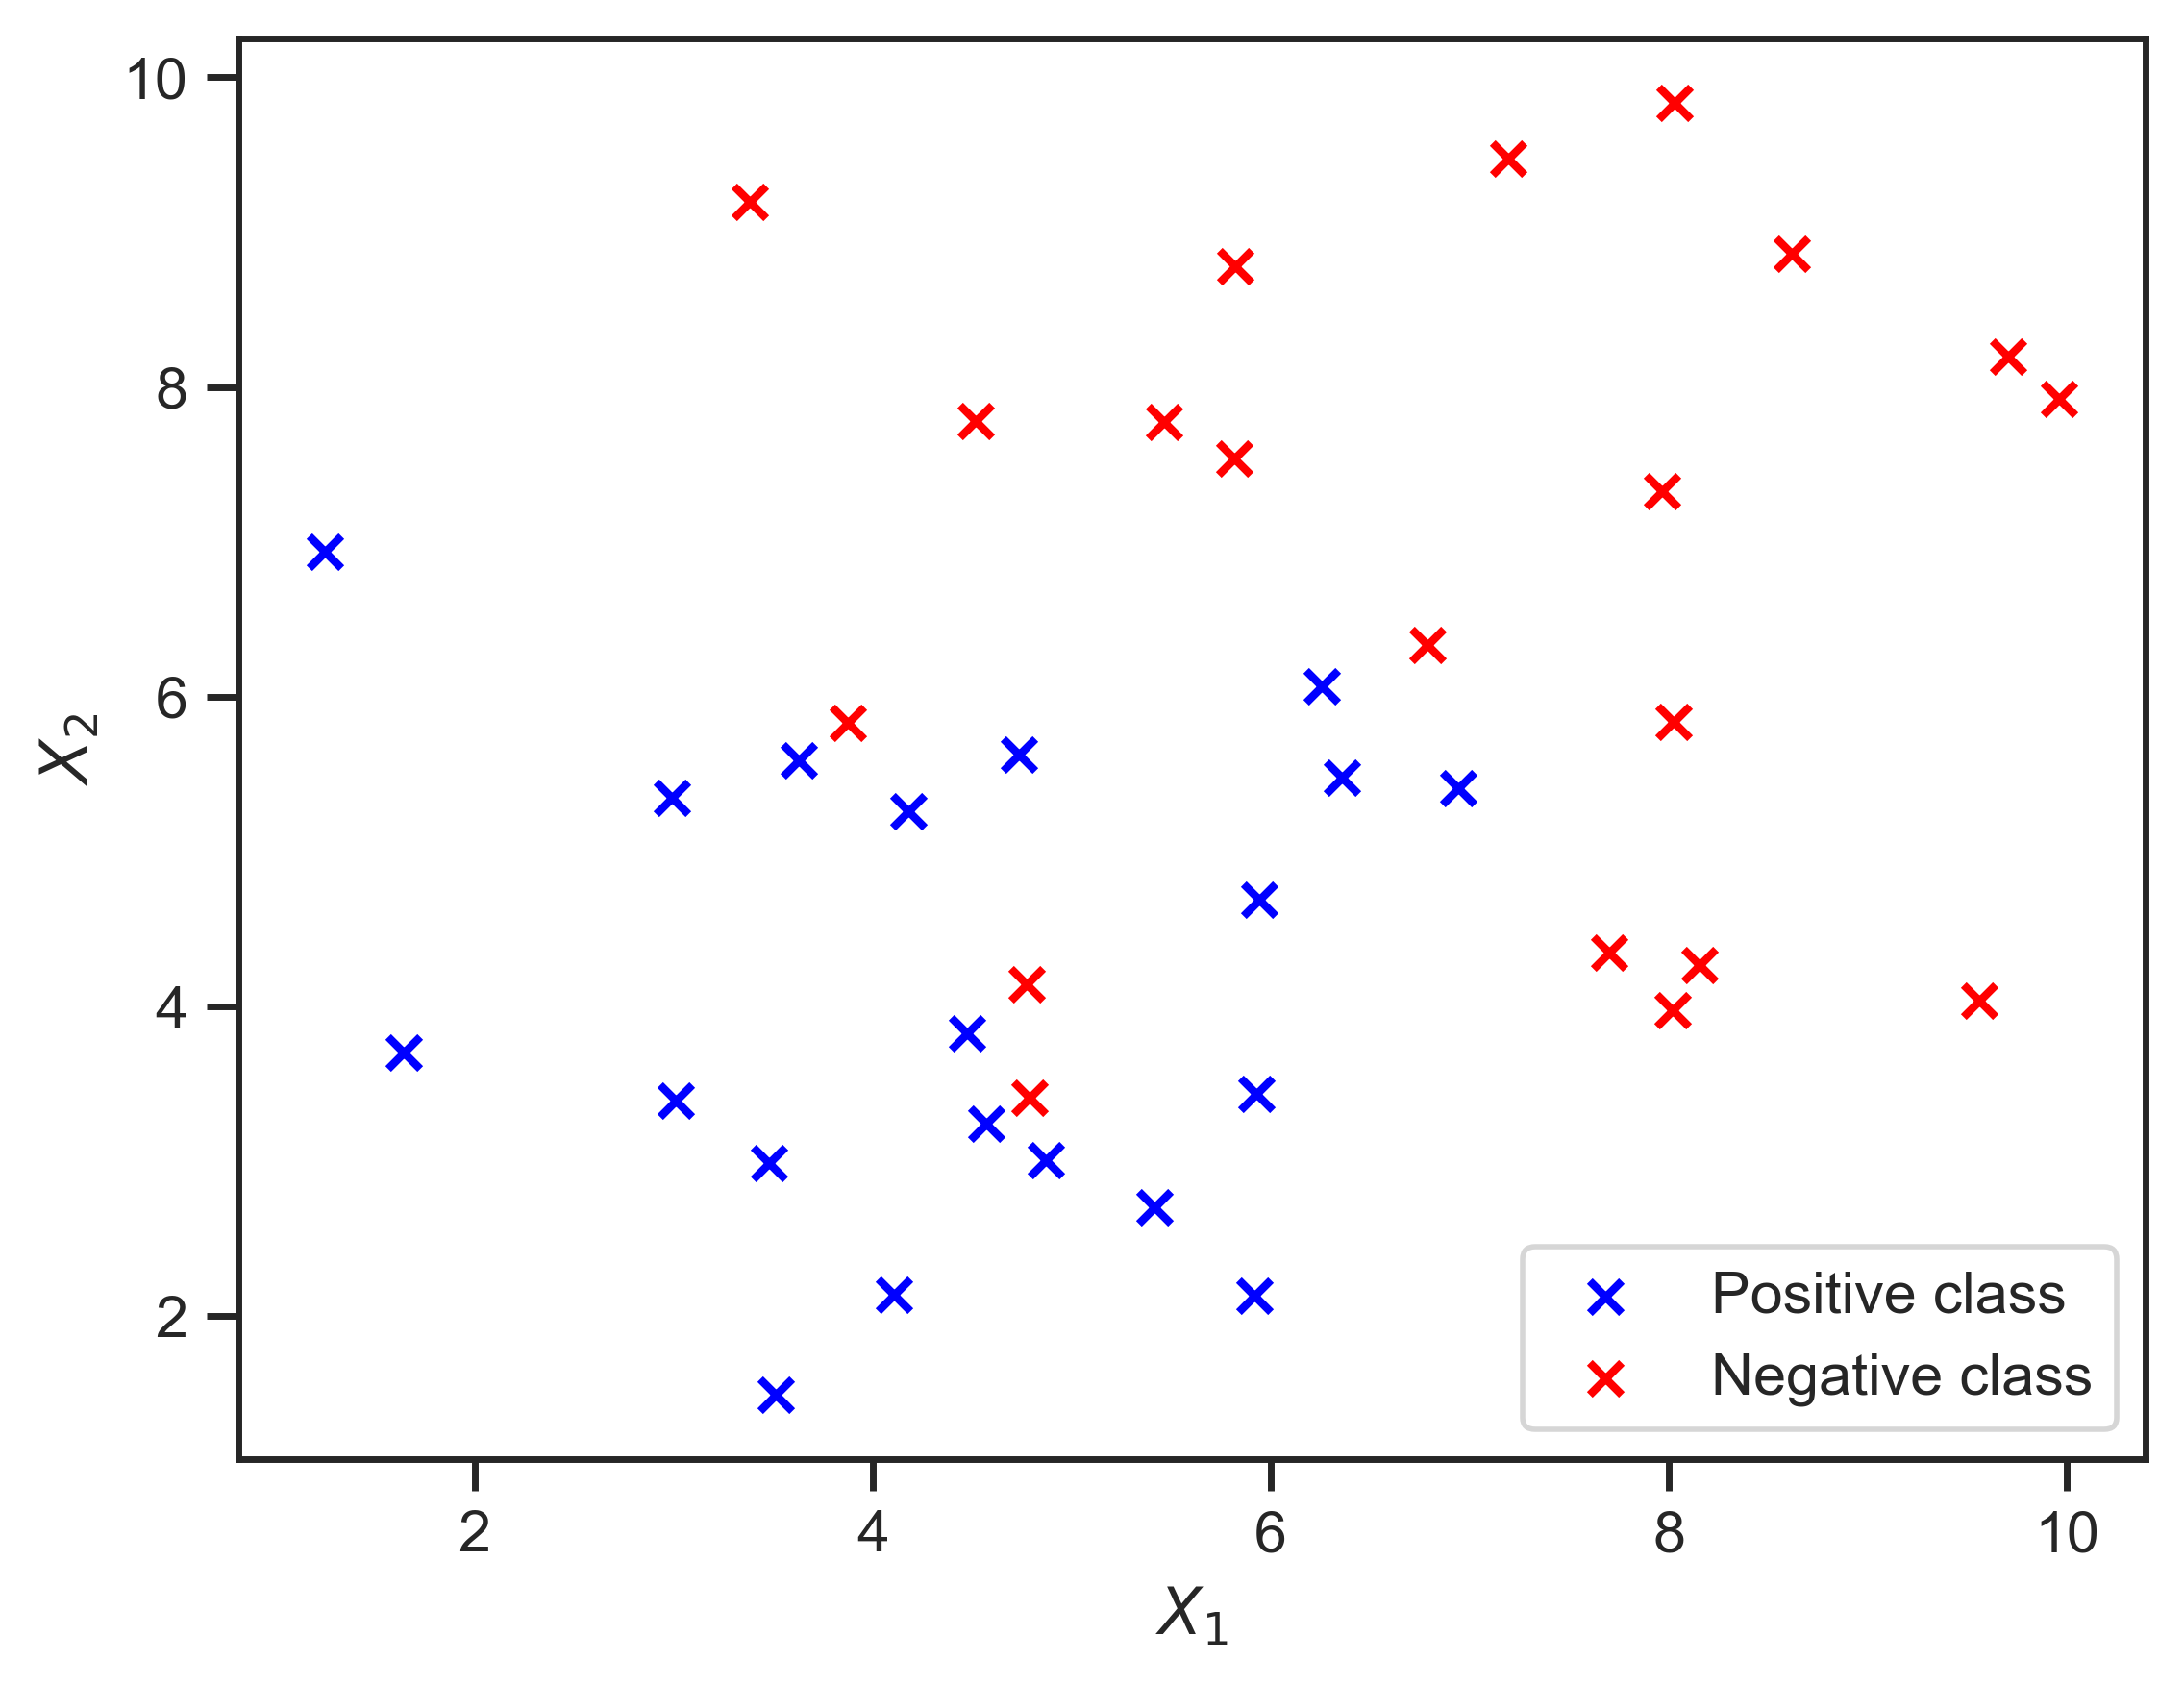

In [85]:
plt.scatter(X_1_pos, X_2_pos, color='blue', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='red', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [86]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
print(X.shape)
print(X[0:3])

(40, 2)
[[6.35716091 5.4790643 ]
 [2.99187883 5.3444234 ]
 [5.92737474 3.43664678]]


In [87]:
# scikit learn expects xx???
# therefore adding response variable as vertical stack
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [90]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [91]:
y_pred = example_lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
positive_indices

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 32, 38]

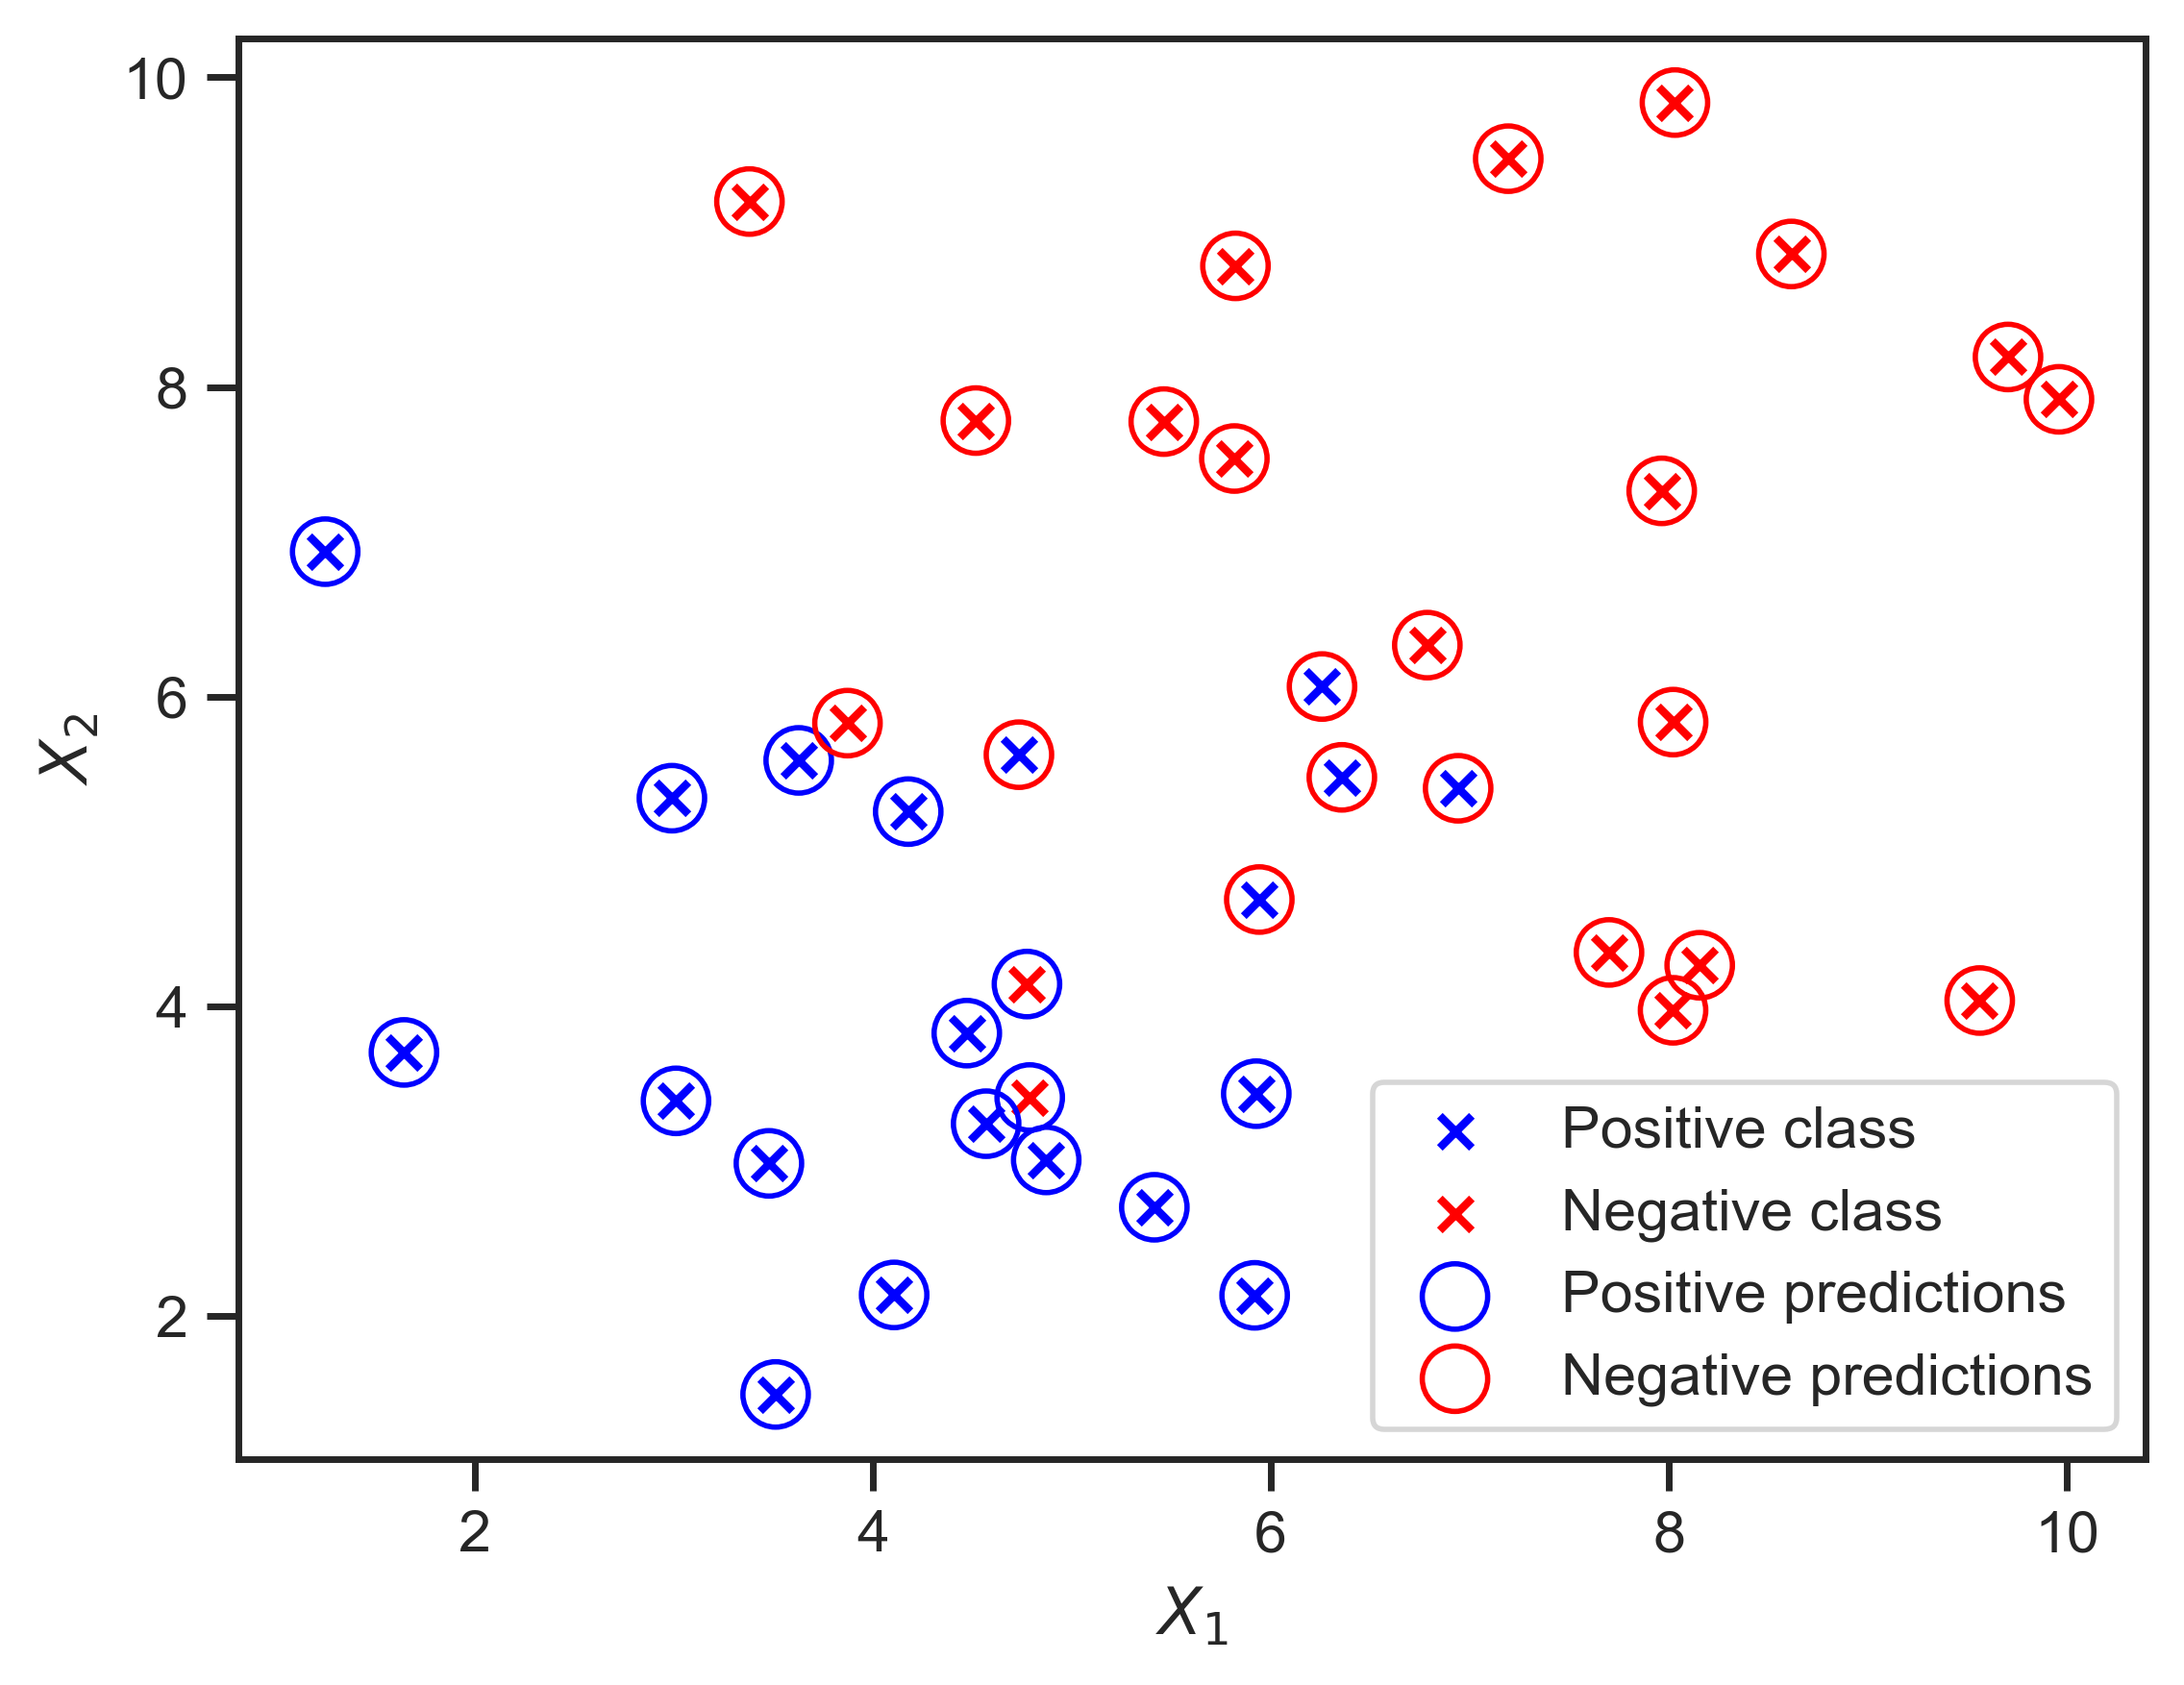

In [92]:
plt.scatter(X_1_pos, X_2_pos, color='blue', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='red', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150,marker='o', edgecolors='blue', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150,marker='o', edgecolors='red', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions',
'Negative predictions'])

#### Plotting the decisoin boundary

In [67]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.20245058016285847 -0.2533642362677322


In [68]:
theta_0 = example_lr.intercept_

In [69]:
X_1_decision_boundary = np.array([0, 10])
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary -(theta_0/theta_2)

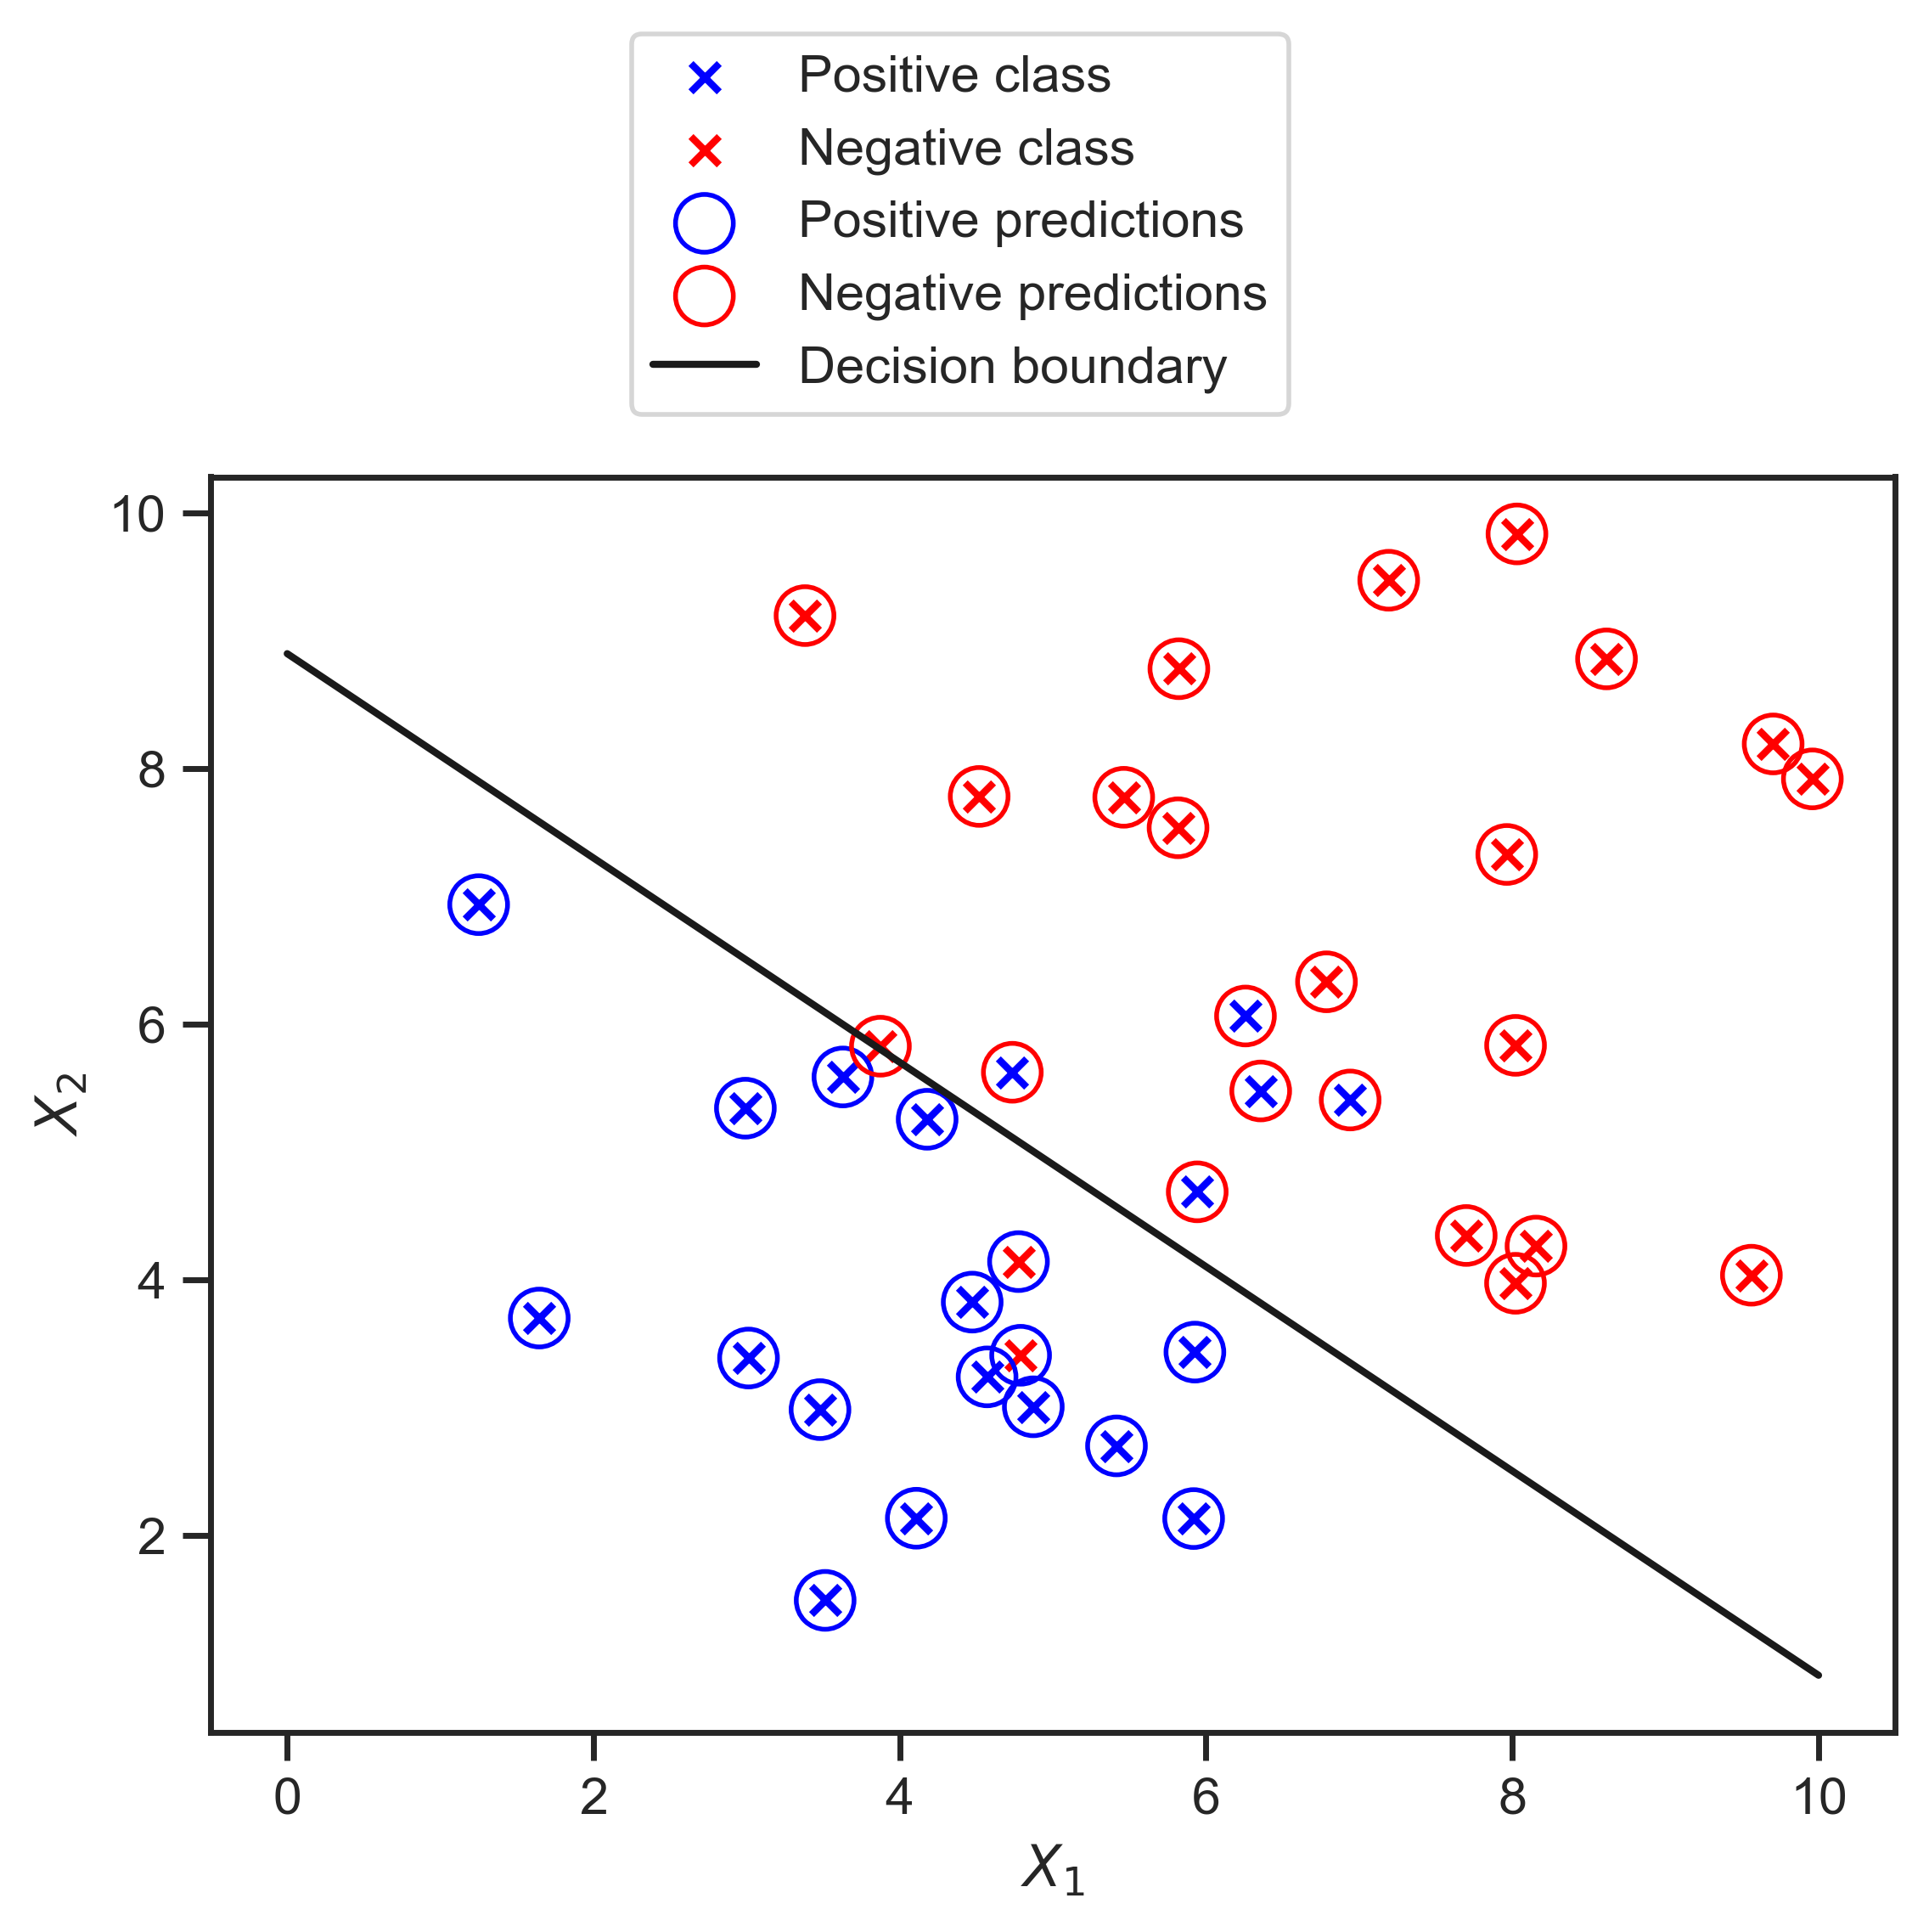

In [93]:
pos_true = plt.scatter(X_1_pos, X_2_pos, color='blue', marker='x',label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg, color='red', marker='x',label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0], X[positive_indices,1],s=150, marker='o', edgecolors='blue', facecolors='none', label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0], X[negative_indices,1],s=150, marker='o', edgecolors='red', facecolors='none', label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-',label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05]) # move legend outside plot

### Activity 3 | Fitting a Logistic Regression Model and using Coefficients

#### Train/ Test split

In [94]:
df = pd.read_csv('.\Data\Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [95]:
features_response = df.columns.tolist()

In [96]:
items_to_keep = ['default payment next month', 'PAY_1', 'LIMIT_BAL']
features_response = [item for item in features_response if item in items_to_keep]
features_response

['LIMIT_BAL', 'PAY_1', 'default payment next month']

In [97]:
    from sklearn.model_selection import train_test_split

In [98]:
#X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(df['PAY_1'].values.reshape(-1,1), df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values.reshape(-1,1), test_size=0.2)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df[['PAY_1', 'LIMIT_BAL']].values, df['default payment next month'].values, test_size = 0.2)

In [100]:
print(y_train.shape, y_test.shape)
print(X_train)

(21331,) (5333,)
[[     0 420000]
 [     0  60000]
 [    -2 130000]
 ...
 [     1  70000]
 [     0  60000]
 [     0  30000]]


In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_reg = LogisticRegression(solver = 'liblinear')
log_reg

LogisticRegression(solver='liblinear')

In [103]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [104]:
y_pred = log_reg.predict(X_test)

In [105]:
y_pred_proba = log_reg.predict_proba(X_test)

In [106]:
print(log_reg.coef_, log_reg.intercept_)

[[ 8.15075533e-11 -6.91246687e-06]] [-6.62703303e-11]


In [107]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)